# First EDA

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
from pandas_profiling import ProfileReport

# Specifing figure layout
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_color_codes('bright')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = (15, 10)

In [78]:
data_raw = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data.csv')

In [81]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ZONEID     175440 non-null  int64  
 1   TIMESTAMP  175440 non-null  object 
 2   TARGETVAR  175265 non-null  float64
 3   U10        175440 non-null  float64
 4   V10        175440 non-null  float64
 5   U100       175440 non-null  float64
 6   V100       175440 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.4+ MB


In [86]:
data_raw[data_raw.isna()['TARGETVAR'] == True].head(50)

ZONEID       TIMESTAMP  TARGETVAR       U10       V10      U100  \
11456       1   20130422 9:00        NaN  3.443181 -3.027788  6.303670   
12052       1   20130517 5:00        NaN  2.804199  2.817081  3.925260   
12196       1   20130523 5:00        NaN -2.591097  3.290387 -3.751520   
12693       1  20130612 22:00        NaN -1.997594  4.385939 -3.797795   
12694       1  20130612 23:00        NaN -1.713462  4.409497 -3.246747   
12844       1   20130619 5:00        NaN -2.882698  0.880447 -4.038918   
13367       1   20130711 0:00        NaN -0.721653 -3.233841 -0.941880   
14223       1  20130815 16:00        NaN -0.151238 -5.951176 -0.109497   
15075       1   20130920 4:00        NaN  5.346351  2.417640  7.621993   
15841       1   20131022 2:00        NaN -3.742070  1.164535 -5.330432   
16080       1   20131101 1:00        NaN  2.283688 -1.004957  3.009493   
28256       2   20130422 9:00        NaN  5.335579  0.671655  8.847683   
28852       2   20130517 5:00        NaN  0.845437  1.941931  1.125408   
28974       2   20130522 7:00        NaN  4.284151  6.068946  6.310979   
28975       2   20130522 8:00        NaN  4.112133  5.762213  6.379447   
28996       2   20130523 5:00        NaN -0.370380  5.435871 -0.494663   
29015       2   20130524 0:00        NaN  1.557253  3.194118  2.123895   
30167       2   20130711 0:00        NaN  0.267799 -3.648766  0.955149   
30463       2   20130723 8:00        NaN -0.418988  1.773327 -0.880475   
31875       2   20130920 4:00        NaN  2.751386  0.516451  3.501461   
32852       2  20131030 21:00        NaN -2.388652  1.146463 -4.128129   
32880       2   20131101 1:00        NaN  3.361682 -2.773291  4.388661   
32895       2  20131101 16:00        NaN  0.238930  1.946033 -0.941669   
32926       2  20131102 23:00        NaN -2.397558  5.684576 -3.165598   
46921       3   20130709 2:00        NaN -1.689161 -1.106670 -2.257763   
47087       3   20130716 0:00        NaN -0.250037 -2.620386 -0.235983   
47137       3   20130718 2:00        NaN -1.956185 -7.557781 -2.711073   
47305       3   20130725 2:00        NaN  1.768665 -4.954121  2.772050   
47400       3   20130729 1:00        NaN  1.792320 -3.887662  2.441647   
47430       3   20130730 7:00        NaN  0.907424  1.551860  1.670764   
47431       3   20130730 8:00        NaN  0.529598  1.355791  1.177236   
47432       3   20130730 9:00        NaN  0.186013  1.849919  0.313105   
47433       3  20130730 10:00        NaN -0.153636  1.825740 -0.363668   
47434       3  20130730 11:00        NaN -0.285088  1.796726 -0.555596   
47435       3  20130730 12:00        NaN -0.374821  1.616044 -0.536403   
47436       3  20130730 13:00        NaN -0.647170  1.419975 -0.438611   
47437       3  20130730 14:00        NaN -0.526345  0.945190 -0.197788   
47438       3  20130730 15:00        NaN -0.222510  0.864301  0.331384   
47439       3  20130730 16:00        NaN -0.078464  0.728020  0.716153   
47449       3   20130731 2:00        NaN  0.820234 -1.245361  1.020002   
47620       3   20130807 5:00        NaN  0.296658  1.734940  0.239159   
47643       3   20130808 4:00        NaN  2.594486  0.392351  3.335034   
47644       3   20130808 5:00        NaN  2.581832 -0.161969  3.351126   
47645       3   20130808 6:00        NaN  1.875077 -0.765262  2.518396   
47646       3   20130808 7:00        NaN  0.676219 -1.087090  1.549464   
47647       3   20130808 8:00        NaN  0.564207 -1.670471  1.623599   
47648       3   20130808 9:00        NaN  0.415169 -1.794251  1.519580   
48027       3   20130824 4:00        NaN  3.304083 -1.821794  4.594218   
48028       3   20130824 5:00        NaN  3.912539 -2.131236  5.585834   
48029       3   20130824 6:00        NaN  3.981088 -2.162540  5.875637   

            V100  
11456  -5.210786  
12052   4.087397  
12196   4.635865  
12693   7.395673  
12694   7.282171  
12844   1.139640  
13367  -5.956103  
14223 -11.251858  
15075   3.431638  
15841   1.555664  
16080  -1.390693  
2825

In [84]:
data_raw.isna()#.sum()

ZONEID  TIMESTAMP  TARGETVAR    U10    V10   U100   V100
0        False      False      False  False  False  False  False
1        False      False      False  False  False  False  False
2        False      False      False  False  False  False  False
3        False      False      False  False  False  False  False
4        False      False      False  False  False  False  False
...        ...        ...        ...    ...    ...    ...    ...
175435   False      False       True  False  False  False  False
175436   False      False       True  False  False  False  False
175437   False      False       True  False  False  False  False
175438   False      False       True  False  False  False  False
175439   False      False       True  False  False  False  False

[175440 rows x 7 columns]

In [30]:
data_raw.dropna(axis=0, inplace=True)

In [31]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175265 entries, 0 to 175433
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ZONEID     175265 non-null  int64  
 1   TIMESTAMP  175265 non-null  object 
 2   TARGETVAR  175265 non-null  float64
 3   U10        175265 non-null  float64
 4   V10        175265 non-null  float64
 5   U100       175265 non-null  float64
 6   V100       175265 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [87]:
data_raw = data_raw.assign(WINDSPEED10=
    np.sqrt(np.power(data_raw['U10'],2) + np.power(data_raw['V10'],2)));
data_raw = data_raw.assign(WINDSPEED100=
    np.sqrt(np.power(data_raw['U100'],2) + np.power(data_raw['V100'],2)));

In [88]:
data_raw["TIMESTAMP"] = pd.to_datetime(data_raw['TIMESTAMP'], 
            format='%Y%m%d %H:%M')

In [89]:
data_raw['dayofyear'] = data_raw['TIMESTAMP'].dt.dayofyear
data_raw['day'] = data_raw['TIMESTAMP'].dt.day
data_raw['month'] = data_raw['TIMESTAMP'].dt.month
data_raw['year'] = data_raw['TIMESTAMP'].dt.year
data_raw['hour'] = data_raw['TIMESTAMP'].dt.hour

In [99]:
data_raw[data_raw.isna()['TARGETVAR'] == True].sort_values('TIMESTAMP').head(50)

ZONEID           TIMESTAMP  TARGETVAR       U10       V10      U100  \
11456       1 2013-04-22 09:00:00        NaN  3.443181 -3.027788  6.303670   
28256       2 2013-04-22 09:00:00        NaN  5.335579  0.671655  8.847683   
12052       1 2013-05-17 05:00:00        NaN  2.804199  2.817081  3.925260   
28852       2 2013-05-17 05:00:00        NaN  0.845437  1.941931  1.125408   
28974       2 2013-05-22 07:00:00        NaN  4.284151  6.068946  6.310979   
28975       2 2013-05-22 08:00:00        NaN  4.112133  5.762213  6.379447   
28996       2 2013-05-23 05:00:00        NaN -0.370380  5.435871 -0.494663   
12196       1 2013-05-23 05:00:00        NaN -2.591097  3.290387 -3.751520   
29015       2 2013-05-24 00:00:00        NaN  1.557253  3.194118  2.123895   
12693       1 2013-06-12 22:00:00        NaN -1.997594  4.385939 -3.797795   
12694       1 2013-06-12 23:00:00        NaN -1.713462  4.409497 -3.246747   
12844       1 2013-06-19 05:00:00        NaN -2.882698  0.880447 -4.038918   
46921       3 2013-07-09 02:00:00        NaN -1.689161 -1.106670 -2.257763   
13367       1 2013-07-11 00:00:00        NaN -0.721653 -3.233841 -0.941880   
30167       2 2013-07-11 00:00:00        NaN  0.267799 -3.648766  0.955149   
47087       3 2013-07-16 00:00:00        NaN -0.250037 -2.620386 -0.235983   
47137       3 2013-07-18 02:00:00        NaN -1.956185 -7.557781 -2.711073   
30463       2 2013-07-23 08:00:00        NaN -0.418988  1.773327 -0.880475   
47305       3 2013-07-25 02:00:00        NaN  1.768665 -4.954121  2.772050   
47400       3 2013-07-29 01:00:00        NaN  1.792320 -3.887662  2.441647   
47430       3 2013-07-30 07:00:00        NaN  0.907424  1.551860  1.670764   
47431       3 2013-07-30 08:00:00        NaN  0.529598  1.355791  1.177236   
47432       3 2013-07-30 09:00:00        NaN  0.186013  1.849919  0.313105   
47433       3 2013-07-30 10:00:00        NaN -0.153636  1.825740 -0.363668   
47434       3 2013-07-30 11:00:00        NaN -0.285088  1.796726 -0.555596   
47435       3 2013-07-30 12:00:00        NaN -0.374821  1.616044 -0.536403   
47436       3 2013-07-30 13:00:00        NaN -0.647170  1.419975 -0.438611   
47437       3 2013-07-30 14:00:00        NaN -0.526345  0.945190 -0.197788   
47438       3 2013-07-30 15:00:00        NaN -0.222510  0.864301  0.331384   
47439       3 2013-07-30 16:00:00        NaN -0.078464  0.728020  0.716153   
47449       3 2013-07-31 02:00:00        NaN  0.820234 -1.245361  1.020002   
47620       3 2013-08-07 05:00:00        NaN  0.296658  1.734940  0.239159   
47643       3 2013-08-08 04:00:00        NaN  2.594486  0.392351  3.335034   
47644       3 2013-08-08 05:00:00        NaN  2.581832 -0.161969  3.351126   
47645       3 2013-08-08 06:00:00        NaN  1.875077 -0.765262  2.518396   
47646       3 2013-08-08 07:00:00        NaN  0.676219 -1.087090  1.549464   
47647       3 2013-08-08 08:00:00        NaN  0.564207 -1.670471  1.623599   
47648       3 2013-08-08 09:00:00        NaN  0.415169 -1.794251  1.519580   
14223       1 2013-08-15 16:00:00        NaN -0.151238 -5.951176 -0.109497   
48027       3 2013-08-24 04:00:00        NaN  3.304083 -1.821794  4.594218   
48028       3 2013-08-24 05:00:00        NaN  3.912539 -2.131236  5.585834   
48029       3 2013-08-24 06:00:00        NaN  3.981088 -2.162540  5.875637   
48076       3 2013-08-26 05:00:00        NaN  2.586211 -0.275182  3.374155   
48077       3 2013-08-26 06:00:00        NaN  2.591887 -0.063595  3.433512   
48078       3 2013-08-26 07:00:00        NaN  2.062471 -0.129152  3.125467   
48079       3 2013-08-26 08:00:00        NaN  1.177138 -0.091074  2.759087   
48080       3 2013-08-26 09:00:00        NaN  1.467790  0.080081  2.372751   
48081       3 2013-08-26 10:00:00        NaN  0.741768  0.365077  1.451172   
48082       3 2013-08-26 11:00:00        NaN -0.147213  0.494228  0.584858   
48083       3 2013-08-26 12:00:00        NaN -0.377870 -0.062024  0.179589   

            V100  WINDSPEED1

In [91]:
data_raw[data_raw.isna()['TARGETVAR'] == True].groupby('ZONEID').count()

TIMESTAMP  TARGETVAR  U10  V10  U100  V100  WINDSPEED10  WINDSPEED100  \
ZONEID                                                                          
1              18          0   18   18    18    18           18            18   
2              21          0   21   21    21    21           21            21   
3              94          0   94   94    94    94           94            94   
4               6          0    6    6     6     6            6             6   
5               6          0    6    6     6     6            6             6   
6               6          0    6    6     6     6            6             6   
7               6          0    6    6     6     6            6             6   
8               6          0    6    6     6     6            6             6   
9               6          0    6    6     6     6            6             6   
10              6          0    6    6     6     6            6             6   

        dayofyear  day  month  year  hour  
ZONEID                                     
1              18   18     18    18    18  
2              21   21     21    21    21  
3              94   94     94    94    94  
4               6    6      6     6     6  
5               6    6      6     6     6  
6               6    6      6     6     6  
7               6    6      6     6     6  
8               6    6      6     6     6  
9               6    6      6     6     6  
10              6    6      6     6     6

In [35]:
def calc_wind_dir(u, v):
    return (180 + 180/np.pi +math.atan2(v, u))%360 

In [36]:
# data_raw['WINDDIR10'] = data_raw[['U10', 'V10']]

In [37]:
data_zone = []
for zone in range(1,11):
    data_zone.append(data_raw[data_raw["ZONEID"] == zone])

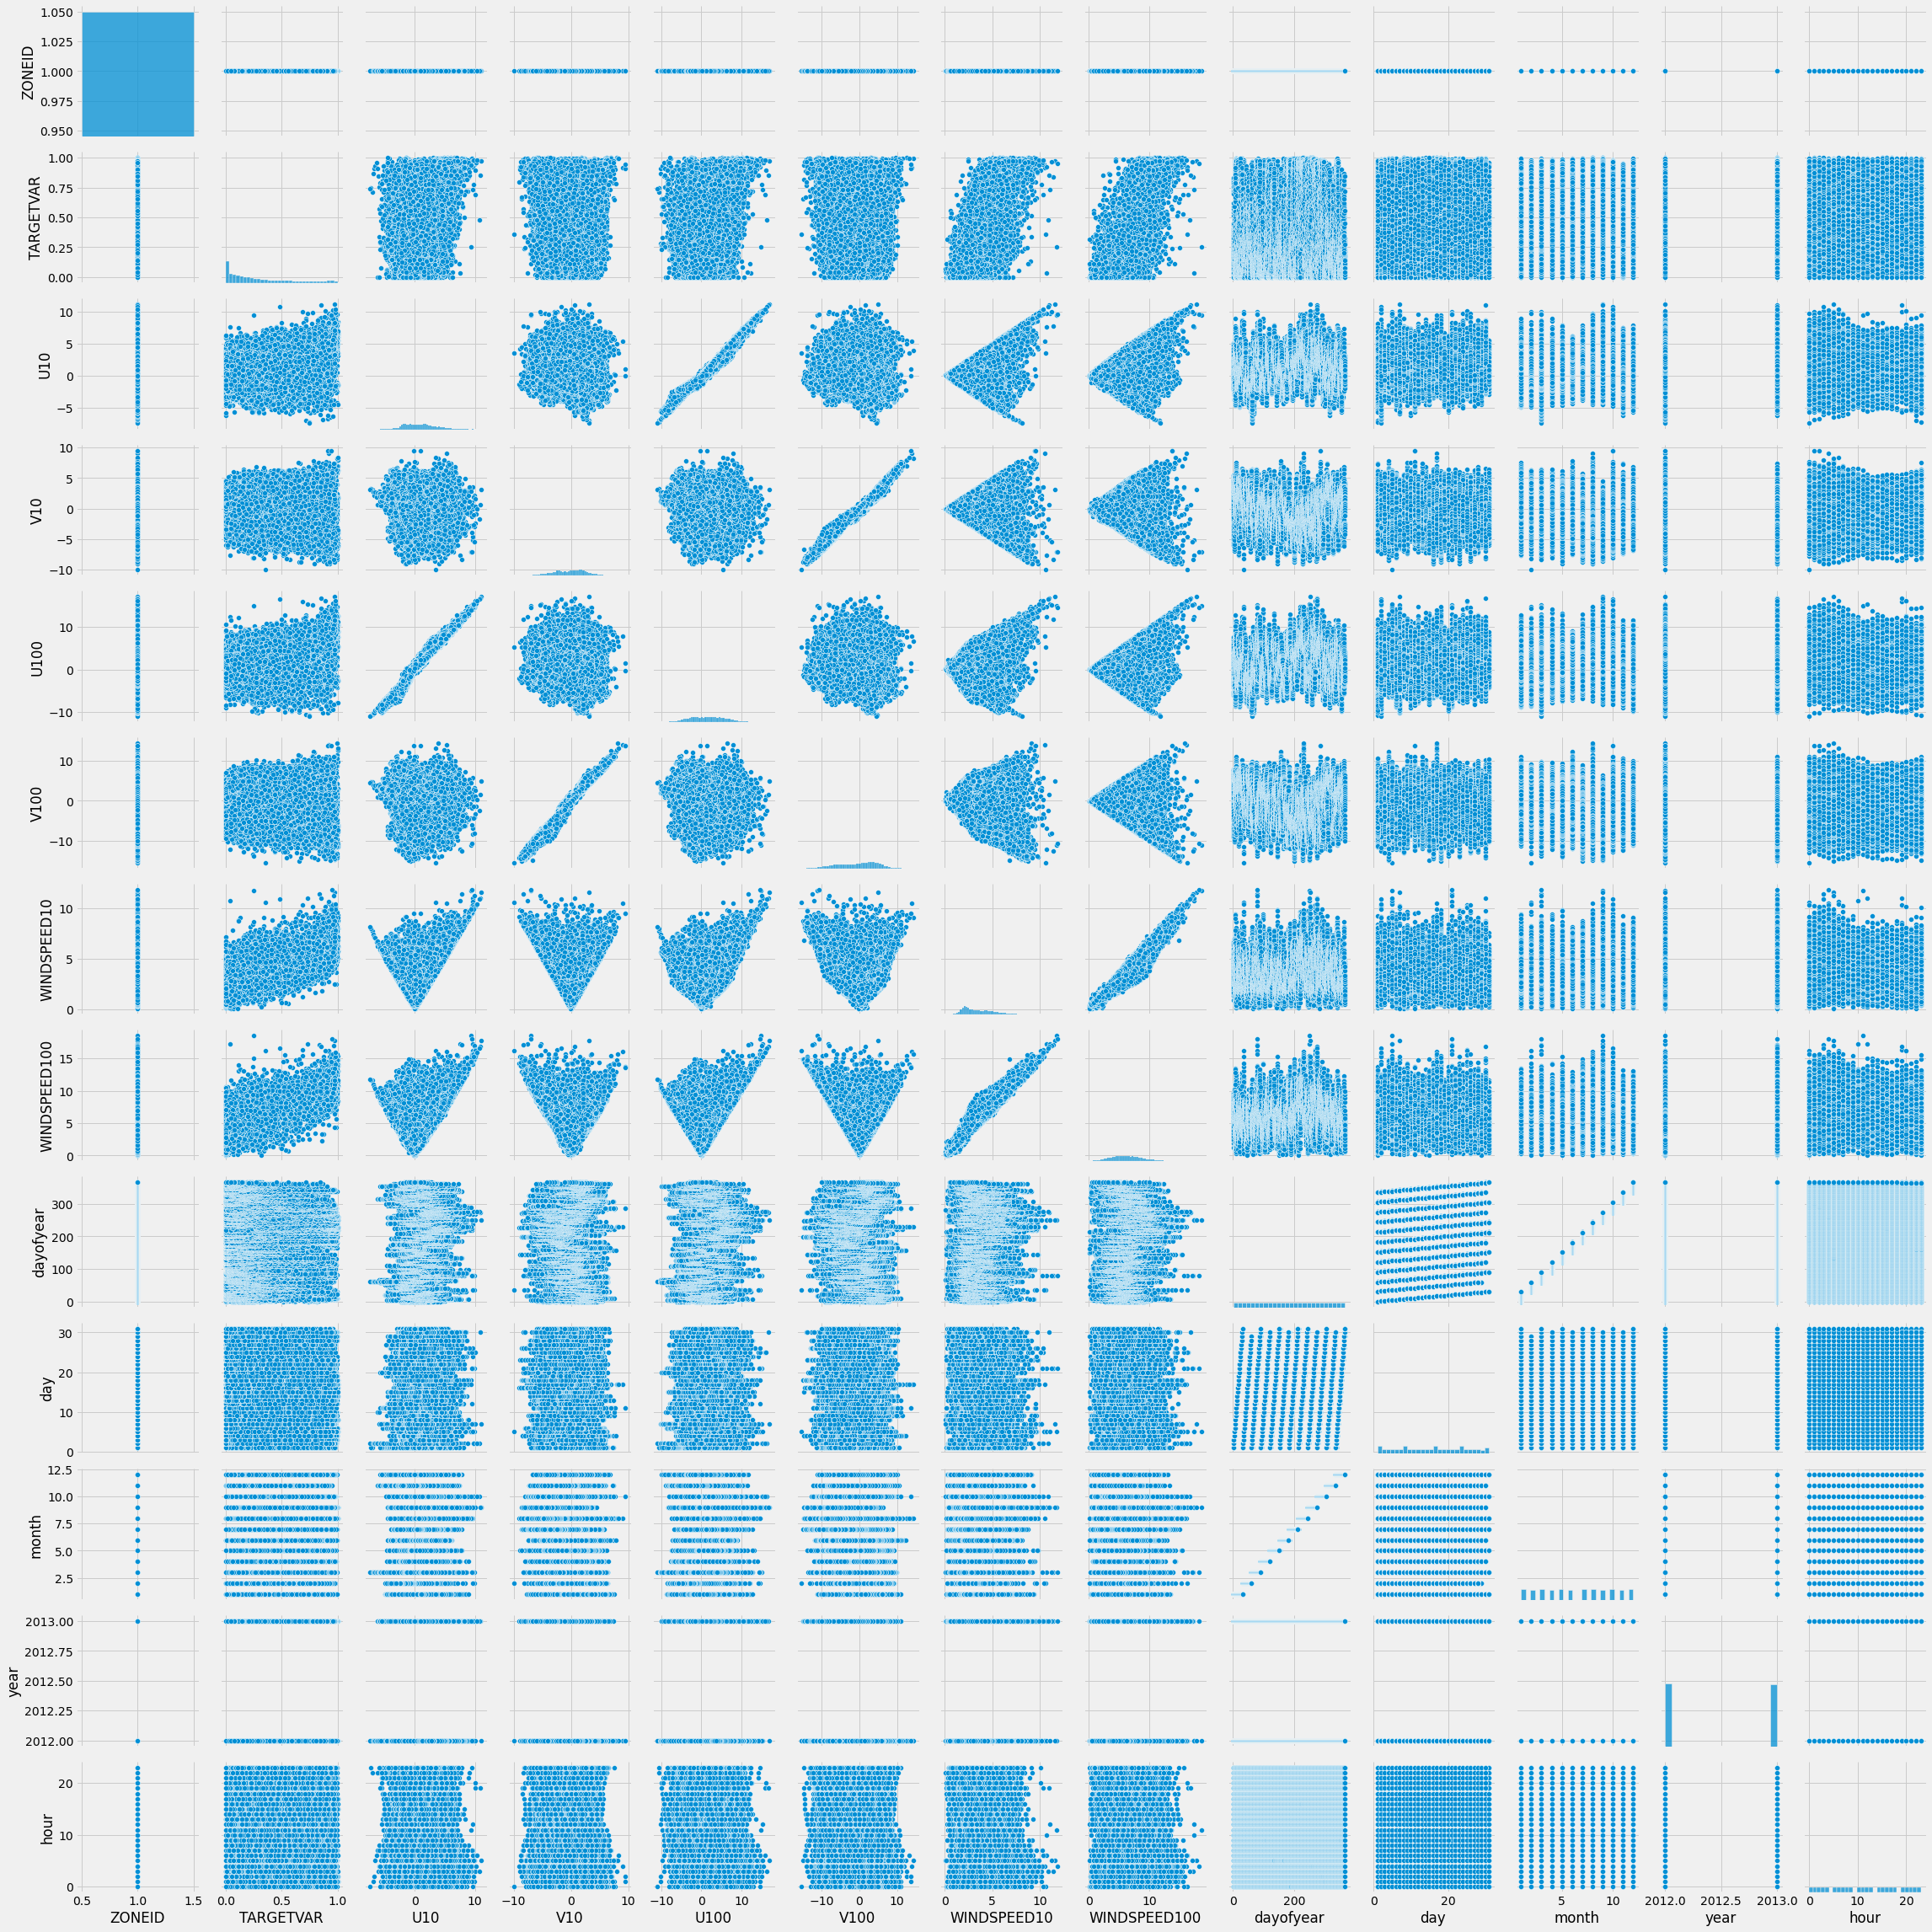

In [38]:
sns.pairplot(data_zone[0])

In [39]:
for zone in data_zone:
    print('Number of entries:',zone.shape)

Number of entries: (17526, 14)
Number of entries: (17523, 14)
Number of entries: (17450, 14)
Number of entries: (17538, 14)
Number of entries: (17538, 14)
Number of entries: (17538, 14)
Number of entries: (17538, 14)
Number of entries: (17538, 14)
Number of entries: (17538, 14)
Number of entries: (17538, 14)


In [100]:
data_raw.corr()

ZONEID  TARGETVAR       U10       V10      U100      V100  \
ZONEID        1.000000e+00   0.028176 -0.022345  0.005984 -0.019453  0.005363   
TARGETVAR     2.817589e-02   1.000000  0.260371 -0.112407  0.252091 -0.125996   
U10          -2.234456e-02   0.260371  1.000000 -0.004441  0.982408  0.023460   
V10           5.984494e-03  -0.112407 -0.004441  1.000000 -0.045271  0.981545   
U100         -1.945296e-02   0.252091  0.982408 -0.045271  1.000000 -0.018429   
V100          5.363374e-03  -0.125996  0.023460  0.981545 -0.018429  1.000000   
WINDSPEED10   1.520639e-02   0.710821  0.452164 -0.065693  0.418935 -0.079512   
WINDSPEED100  1.220188e-02   0.764101  0.385463 -0.167059  0.367079 -0.186394   
dayofyear     4.358806e-15   0.049064  0.151591 -0.060832  0.156506 -0.059865   
day          -2.752506e-15  -0.021194  0.011374 -0.005023  0.012111 -0.004260   
month         7.387866e-15   0.051180  0.151723 -0.061950  0.156703 -0.061006   
year          1.437377e-11   0.015372  0.004609 -0.050193  0.007876 -0.055123   
hour          3.482191e-15   0.043657 -0.161880 -0.041709 -0.130633 -0.045067   

              WINDSPEED10  WINDSPEED100     dayofyear           day  \
ZONEID           0.015206      0.012202  4.358806e-15 -2.752506e-15   
TARGETVAR        0.710821      0.764101  4.906375e-02 -2.119426e-02   
U10              0.452164      0.385463  1.515913e-01  1.137398e-02   
V10             -0.065693     -0.167059 -6.083163e-02 -5.023375e-03   
U100             0.418935      0.367079  1.565058e-01  1.211056e-02   
V100            -0.079512     -0.186394 -5.986480e-02 -4.259750e-03   
WINDSPEED10      1.000000      0.916406  6.977887e-02 -1.219188e-02   
WINDSPEED100     0.916406      1.000000  8.449786e-02 -1.719658e-02   
dayofyear        0.069779      0.084498  1.000000e+00  9.241493e-02   
day             -0.012192     -0.017197  9.241493e-02  1.000000e+00   
month            0.071035      0.086530  9.965013e-01  9.157081e-03   
year             0.012593      0.022350 -2.762614e-03 -2.441731e-03   
hour            -0.189857      0.015745 -1.285173e-15 -4.313605e-17   

                     month          year          hour  
ZONEID        7.387866e-15  1.437377e-11  3.482191e-15  
TARGETVAR     5.118005e-02  1.537156e-02  4.365747e-02  
U10           1.517229e-01  4.609344e-03 -1.618796e-01  
V10          -6.195017e-02 -5.019269e-02 -4.170884e-02  
U100          1.567025e-01  7.876252e-03 -1.306330e-01  
V100         -6.100564e-02 -5.512340e-02 -4.506739e-02  
WINDSPEED10   7.103514e-02  1.259254e-02 -1.898568e-01  
WINDSPEED100  8.652954e-02  2.234961e-02  1.574509e-02  
dayofyear     9.965013e-01 -2.762614e-03 -1.285173e-15  
day           9.157081e-03 -2.441731e-03 -4.313605e-17  
month         1.000000e+00  1.427274e-03 -1.291813e-15  
year          1.427274e-03  1.000000e+00 -3.786929e-04  
hour         -1.291813e-15 -3.786929e-04  1.000000e+00

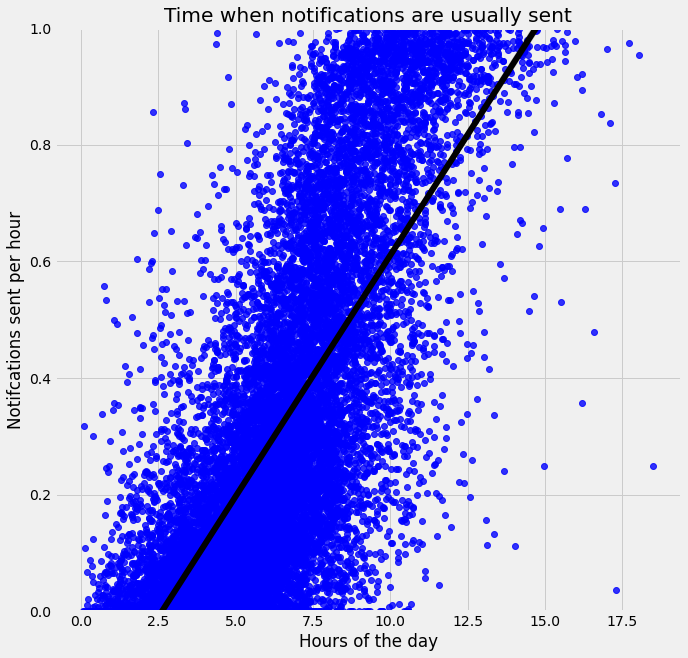

In [41]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.regplot(x='WINDSPEED100', y='TARGETVAR', data=data_zone[0], 
            scatter_kws={"color": "blue"}, line_kws={"color": "black"})
_ = ax.set_ylim(0,1)
_ = ax.set_title('Time when notifications are usually sent')
_ = ax.set_xlabel('Hours of the day')
_ = ax.set_ylabel('Notifcations sent per hour')


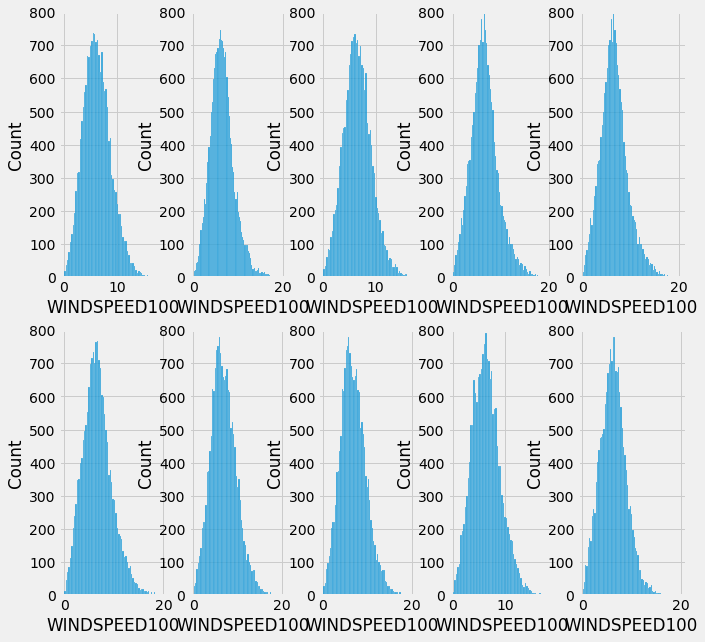

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.histplot(x='WINDSPEED100', data=data_zone[i-1])
    plt.ylim(0,800)

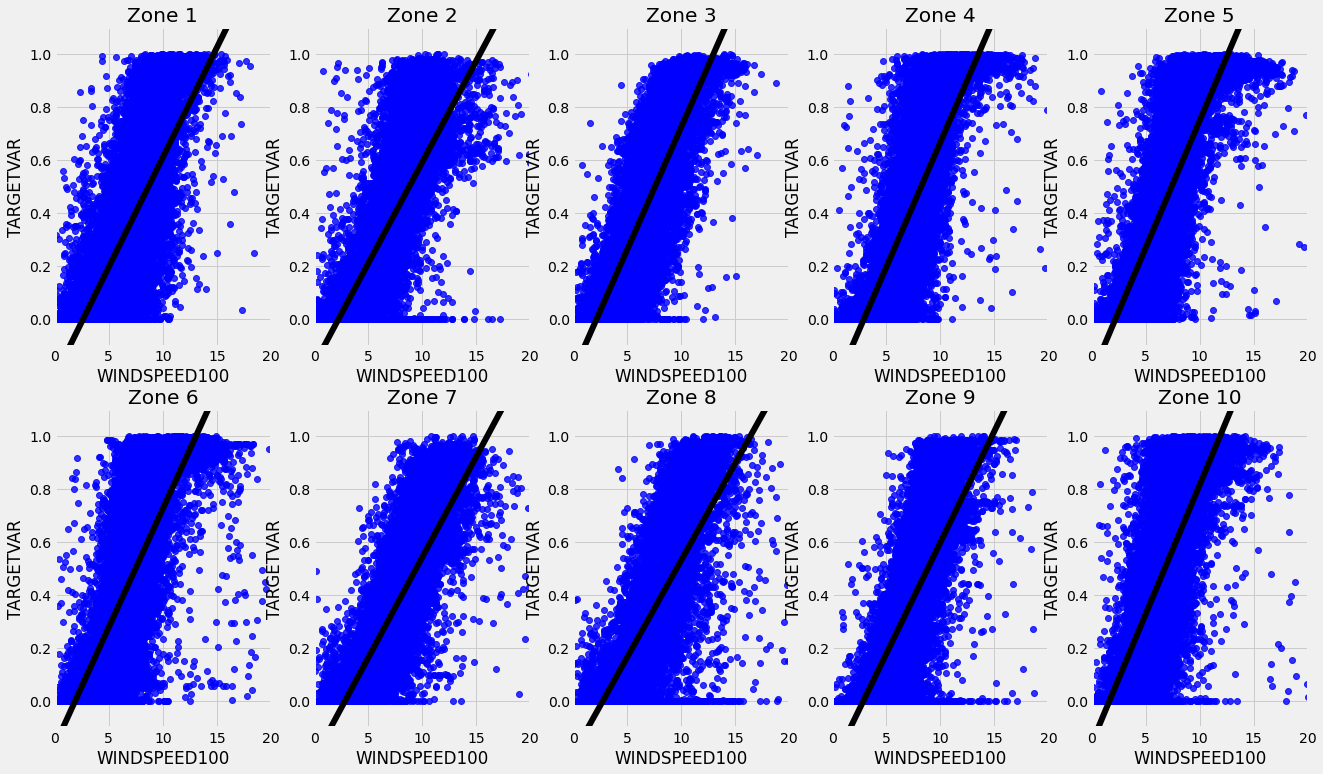

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.regplot(x='WINDSPEED100', y='TARGETVAR', data=data_zone[i-1], 
             scatter_kws={"color": "blue"}, line_kws={"color": "black"})
    plt.xlim(0,20)
    plt.ylim(-0.1,1.1)
    plt.title('Zone '+str(i))

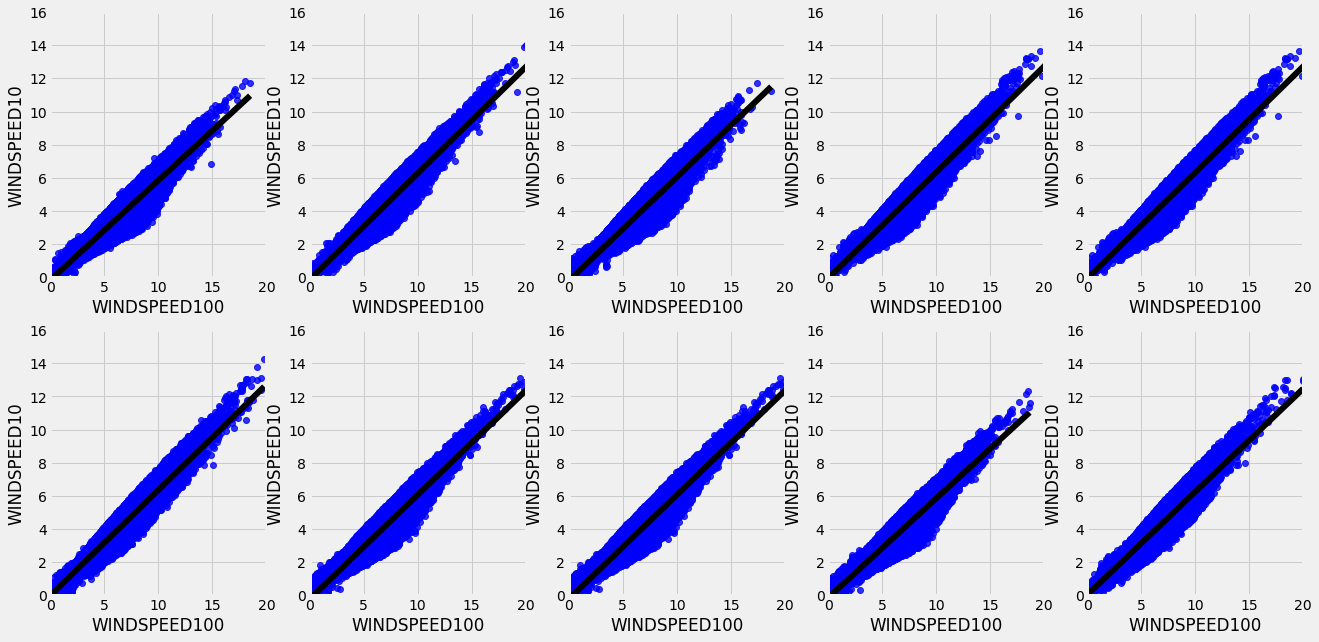

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.regplot(x='WINDSPEED100', y='WINDSPEED10', data=data_zone[i-1], 
             scatter_kws={"color": "blue"}, line_kws={"color": "black"})
    plt.xlim(0,20)
    plt.ylim(0,16)

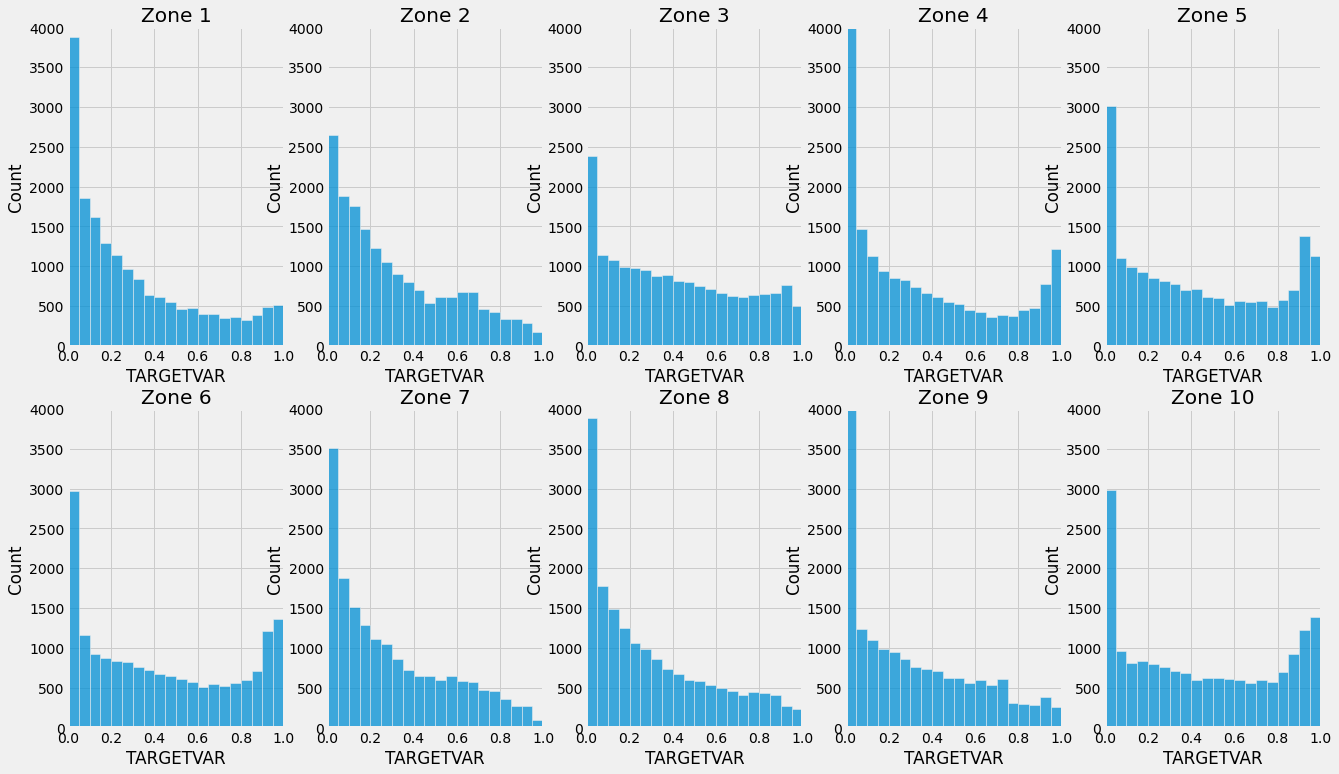

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.histplot(x='TARGETVAR', data=data_zone[i-1], bins=20)
    plt.title('Zone '+str(i))
    # sns.regplot(x='WINDSPEED100', y='WINDSPEED10', data=data_zone[i-1], 
    #          scatter_kws={"color": "blue"}, line_kws={"color": "black"})
    plt.xlim(0,1)
    plt.ylim(0,4000)

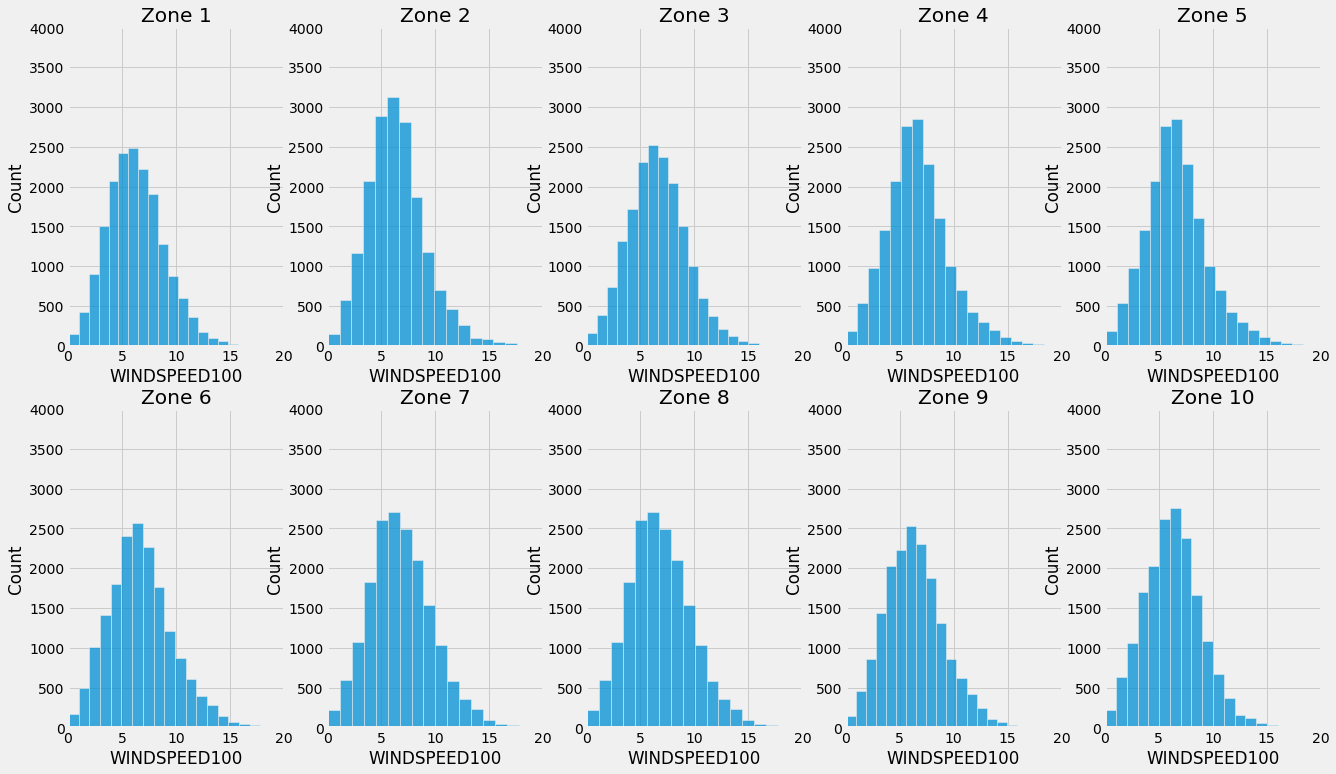

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.histplot(x='WINDSPEED100', data=data_zone[i-1], bins=20)
    plt.title('Zone '+str(i))
    plt.xlim(0,20)
    plt.ylim(0,4000)

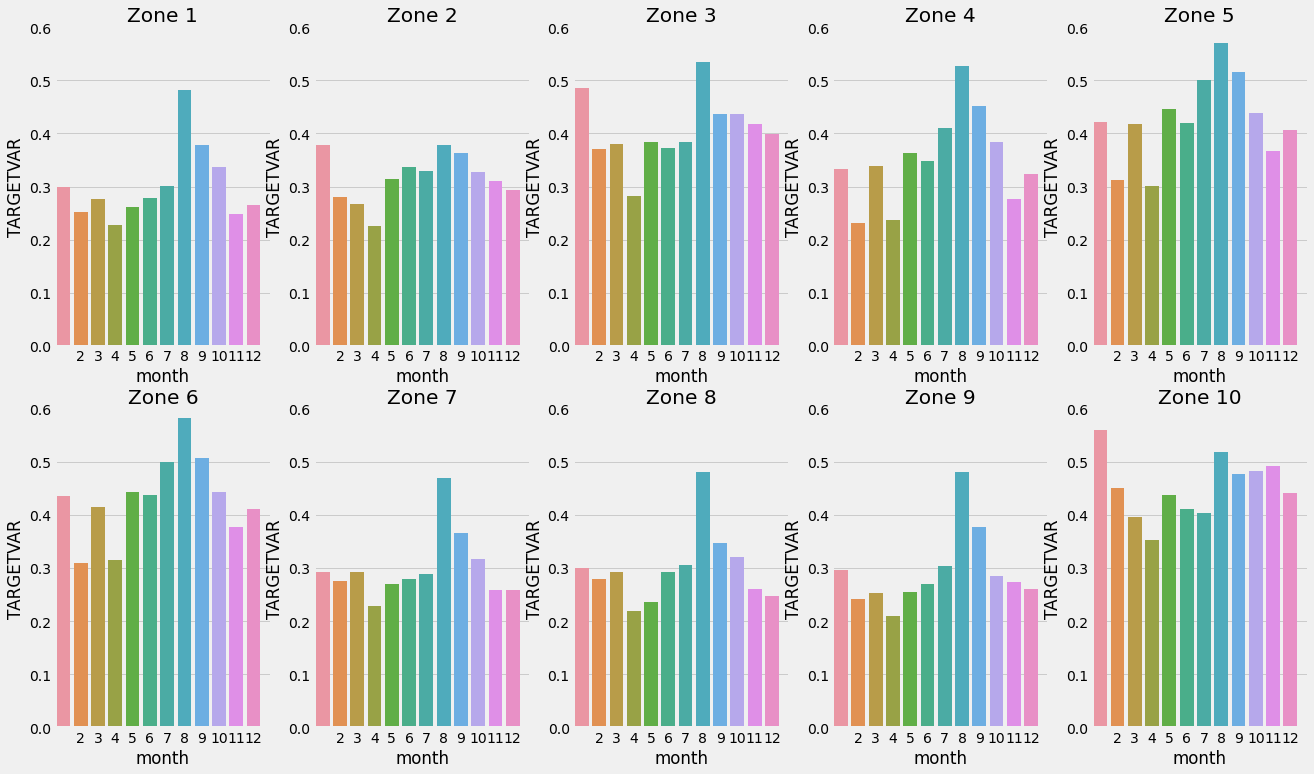

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12), sharey=True)
for i in range(1,11):
    plt.subplot(2, 5, i)
    df_tmp = data_zone[i-1]
    df_tmp = df_tmp.groupby('month').mean().reset_index()
    sns.barplot(x='month', y='TARGETVAR', data=df_tmp)
    plt.title('Zone '+str(i))
    plt.xticks(range(1,13))
    #plt.xlim(0,20)
    plt.ylim(0,0.6)

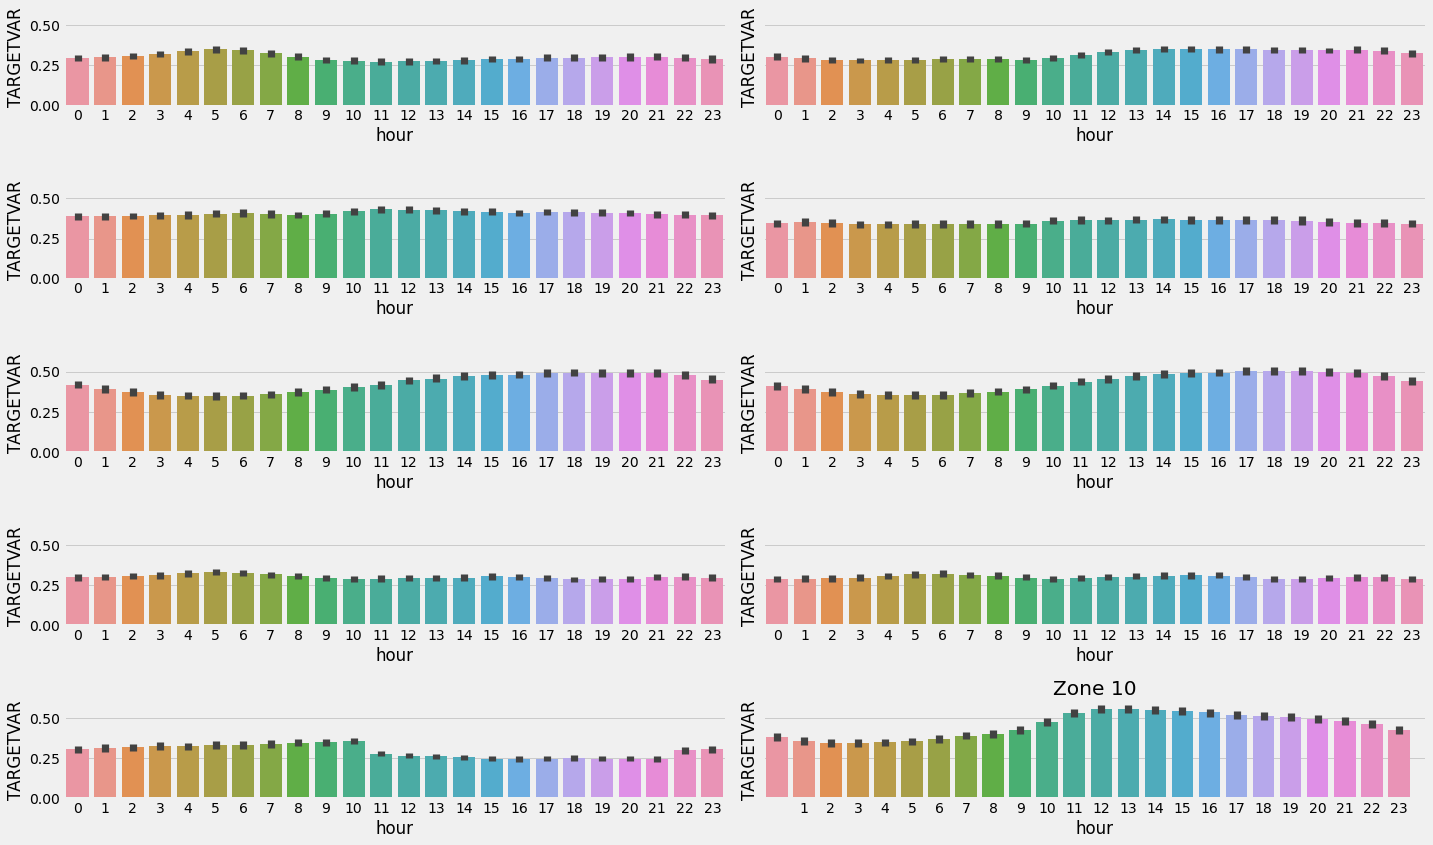

In [76]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,12), sharey=True)
ax = ax.ravel()
for i in range(1,11):
    #plt.subplot(2, 5, i)
    df_tmp = data_zone[i-1]
    #df_tmp = df_tmp.groupby('hour').mean().reset_index()
    sns.barplot(x='hour', y='TARGETVAR', data=df_tmp, ax=ax[i-1])
    plt.title('Zone '+str(i))
    plt.xticks(range(1,25))
    #plt.xlim(0,20)
    #plt.ylim(0,1)
fig.tight_layout()